## Lennard Jones Diatomic Molecule

- We can generalize this for the Lennard-Jones potential
  - by simply changing the potential and re-running the steps

In [1]:
diatomicKineticEnergy = Sum[1/2 m[i] D[q[i][t], t]^2, {i, 2}];

lennardJonesPotentialNonDimensional[ρ_]=1/ρ^12 - 2/ρ^6;
diatomicPotentialEnergy["lj"] = lennardJonesPotentialNonDimensional[q[2][t] - q[1][t]];

diatomicLagrangian = diatomicKineticEnergy - diatomicPotentialEnergy["lj"];
diatomicHamiltonian = diatomicKineticEnergy + diatomicPotentialEnergy["lj"];

diatomicCanonicalSubstitutions = First[
  Solve[{
    p[1][t] == D[diatomicLagrangian, q[1]'[t]],
    p[2][t] == D[diatomicLagrangian, q[2]'[t]]
    }, {q[1]'[t], q[2]'[t]}]
];

In [7]:
diatomicCanonicalHamiltonianLJ = diatomicHamiltonian /. diatomicCanonicalSubstitutions;

diatomicHamiltonsEquationsLJ = {
 D[q[1][t], t] == D[diatomicCanonicalHamiltonianLJ, p[1][t]],
 D[q[2][t], t] == D[diatomicCanonicalHamiltonianLJ, p[2][t]],
 D[p[1][t], t] == -D[diatomicCanonicalHamiltonianLJ, q[1][t]],
 D[p[2][t], t] == -D[diatomicCanonicalHamiltonianLJ, q[2][t]]
};

- The equations of motion can no-longer be solved analytically
  - so we proceed numerically

In [11]:
diatomicInitialConditions = {
  q[1][0] == -5/8, q[2][0] == 5/8, 
  p[1][0] == 0, p[2][0] == 0
};

diatomicMoleculeSolutionsLJ = ParametricNDSolveValue[
   Join[diatomicHamiltonsEquationsLJ, 
    diatomicInitialConditions], {q[1], q[2], p[1], p[2]},
   {t, 0, 1}, {m[1], m[2]}
];

- Finally, let's visualize our Lennard Jones dimer!

In [13]:
spring[start_ : {0, 0}, end_ : {1, 0}, n_ : 20, w_ : .2] := 
 With[{vector = end - start}, 
  BSplineCurve@(start + # & /@ 
       Transpose[{vector, -Cross[vector]} . {(# - 1)/(2 n), 
          Re[I^#] w/Norm[vector]}] &@Range[2 n + 1])]

visualizeDiatomicMolecule[{x1_, x2_}, {m1_, m2_}, colors_ : {Red, Blue}][t_] := 
 Graphics[{
  spring[{x1[t] + Sqrt[m1], 0}, {x2[t] - Sqrt[m2], 0}],
  colors[[1]], Disk[{x1[t], 0}, Sqrt[m1]], colors[[2]], Disk[{x2[t], 0}, Sqrt[m2]]
  }, PlotRange -> {{-1.1, 1.1}, {-1/4, 1/4}}, Axes -> True, Ticks -> None, ImageSize -> 350]

baseLJGraphic = 
  Plot[lennardJonesPotentialNonDimensional[ρ], {ρ, 3/4, 
    3/2}, PlotStyle -> Directive[Blue, Thick], Frame -> True, 
   FrameStyle -> Directive[Black, Thick], 
   FrameLabel -> {"Normalized separation distance", 
     "Potential Energy"}, BaseStyle -> 14, ImageSize -> 350, 
   GridLines -> {{1}, None}];

visualizeDiatomicMoleculePlusPotentialLJ[{x1_, x2_}, {m1_, m2_}, colors_ : {Red, Blue}][t_] := 
 Block[{distance = x2[t] - x1[t]}, 
  Show[baseLJGraphic, 
   Graphics[{PointSize[0.0375], 
     Point[{distance, lennardJonesPotentialNonDimensional[distance]}],
      Inset[visualizeDiatomicMolecule[{x1, x2}, {m1, m2}, colors][
       t], {1.25, 1.5}, {0, 0}, 0.5]}]]]

Manipulate[PaneSelector[{1 -> -Graphics-, 2 -> -Graphics-, 3 -> -Graphics-, 
 
>     4 -> -Graphics-, 5 -> -Graphics-, 6 -> -Graphics-, 7 -> -Graphics-, 
 
>     8 -> -Graphics-, 9 -> -Graphics-, 10 -> -Graphics-, 11 -> -Graphics-, 
 
>     12 -> -Graphics-, 13 -> -Graphics-, 14 -> -Graphics-, 15 -> -Graphics-, 
 
>     16 -> -Graphics-, 17 -> -Graphics-, 18 -> -Graphics-, 19 -> -Graphics-, 
 
>     20 -> -Graphics-, 21 -> -Graphics-, 22 -> -Graphics-, 23 -> -Graphics-, 
 
>     24 -> -Graphics-, 25 -> -Graphics-}, Dynamic[i13], ImageSize -> All, 
 
>    Alignment -> Automatic, BaseStyle -> ListAnimateCore, 
 
>    TransitionDirection -> Horizontal, TransitionDuration -> 0.5, 
 
>    TransitionEffect -> Automatic], 
 
>   {{i13, 1, }, 1, 25, 1, AnimationRate -> Automatic, DisplayAllSteps -> True, 
 
>    AppearanceElements -> 
 
>     {ProgressSlider, PlayPauseButton, FasterSlowerButtons, DirectionButton}}, 
 
>   Paneled -> False, ControlType -> Animator, AppearanceElements -> None, 
 
>   DefaultBaseStyle -> ListAnimate, DefaultLabelStyle -> ListAnimateLabel, 
 
>   SynchronousUpdating -> True, Method -> 
 
>    {DynamicCore -> False, TemplateExpand -> True}, 
 
>   Bookmarks -> {min :> {i13 = 1}, max :> {i13 = 25}}]
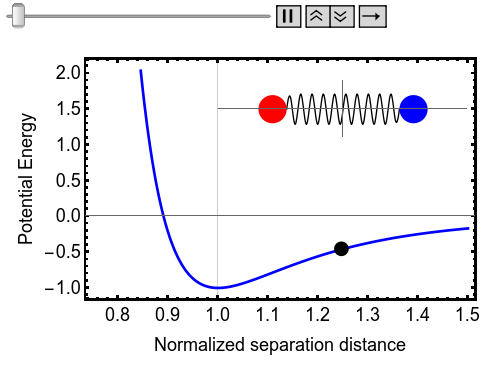

In [18]:
ListAnimate[
Table[
 visualizeDiatomicMoleculePlusPotentialLJ[
  diatomicMoleculeSolutionsLJ[1/4^2, 1/4^2][[;; 2]], {1/8^2, 
   1/8^2}][t],
   {t, Subdivide[0,0.22,25]//Rest}],
Paneled -> False]